# Data Science and Statistics Short Answer Questions

## 1. Common Data Cleaning Steps

Two common data cleaning steps are:
- **Handling missing values** - either by removing records with missing data, imputing values, or using techniques like mean/median substitution
- **Removing duplicates** - identifying and eliminating duplicate records that could skew analysis results 

## 2. Main Goal of Gradient Descent

The main goal of gradient descent is to **minimize errors between predicted and actual results** by finding the optimal weights and bias for a machine learning model. It's an optimization algorithm that iteratively finds the parameters that produce the model with the lowest loss.

## 3. Overfitting Definition and Prevention

**Overfitting** occurs when a model learns the training data too well, including noise and specific patterns that don't generalize to new data. This results in high accuracy on training data but poor performance on test data.

One common technique to prevent overfitting is **regularization** (like L1 or L2 regularization), which adds a penalty term to discourage overly complex models.

## 4. Supervised vs Unsupervised Learning

**Supervised learning** uses labeled training data to learn a mapping from inputs to outputs.
- Example: Email spam classification (emails labeled as "spam" or "not spam")

**Unsupervised learning** finds patterns in data without labeled examples.
- Example: Customer segmentation using clustering algorithms

## 5. Hypothesis Test Conclusion (α = 0.05, p = 0.07)

With a p-value of 0.07 and significance level α = 0.05, I would **fail to reject the null hypothesis**. Since p-value (0.07) > α (0.05), there isn't sufficient evidence to conclude that the observed effect is statistically significant.

## 6. P-value Definition

A **p-value** represents the probability of observing results as extreme as (or more extreme than) what was actually observed, assuming the null hypothesis is true. It helps decision-making by providing a measure of evidence against the null hypothesis - smaller p-values indicate stronger evidence against the null hypothesis.

## 7. Continuous vs Discrete Variables

**Continuous variables** can take any value within a range and can be measured with infinite precision.
- Example: Height (can be 5.7234... feet)

**Discrete variables** can only take specific, countable values.
- Example: Number of children in a family (0, 1, 2, 3...)

## 8. Confidence Intervals in Hypothesis Testing

A **confidence interval** provides a range of plausible values for a parameter with a specified level of confidence (e.g., 95%). In hypothesis testing, if the null hypothesis value falls outside the confidence interval, it suggests rejecting the null hypothesis. If it falls within the interval, we fail to reject it.

## 9. Sample Size and Statistical Power

**Larger sample sizes increase the power** of a hypothesis test (ability to detect true effects when they exist). If sample size is too small:
- **Low statistical power** - higher chance of missing real effects (Type II errors)
- **Less precise estimates** - wider confidence intervals
- **Reduced ability to detect small but meaningful differences**

## 10. Colleague's Understanding of Correlation

Your colleague is **partially correct but incomplete**. While correlation does measure the degree to which two phenomena are related, it's important to clarify that:

- Correlation specifically measures **linear relationships**
- It indicates **strength and direction** of the relationship (-1 to +1)
- **Correlation does not imply causation** - two variables can be correlated without one causing the other
- It only captures linear associations, missing non-linear relationships

A more complete understanding would include these nuances about what correlation can and cannot tell us about relationships between variables.


# Problem A
1. Review dataset. If any cleaning necessary, let me know what has been cleaned.
2. Specify the null hypothesis, and alternative hypothesis. Provide both statements
clearly. 3. Specify which test you will be using to analyze (ie. T-test, ANOVA, z-test,
etc.)
4. Compute the statistic
5. Determine p-value
6. Compare p-value with significance level 0.05 7. Interpret, interpret, interpret your
results. Use visualization if necessary. 8. Submit your logic, calculations, Python code,
and explanation of results

In [4]:
# cleaning
# Comprehensive cleaning requirements for the Titanic dataset:

import pandas as pd
import numpy as np

# After loading the data, here are the cleaning steps needed:
df = pd.read_csv('trainv1.csv')

# 1. Missing Values
print("--- MISSING VALUES TO HANDLE ---")
# - Age: Multiple empty values (passengers 6, 18, 21, 28, 29, 31, 32, etc.)
# - Cabin: Extensive missing values throughout the dataset
# - Embarked: A few missing values (e.g., passenger 62)

# 2. Data Type Conversions
print("\n--- DATA TYPE CONVERSIONS NEEDED ---")
# Age column - convert to numeric and handle empty strings
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fare column - ensure it's numeric
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# 3. Handle Missing Embarked Values
print("\n--- SPECIFIC CLEANING STEPS ---")
# Check and fill missing Embarked values (typically filled with mode)
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Filled {df['Embarked'].isnull().sum()} missing Embarked values with mode: {embarked_mode}")

# 4. Handle Zero Fares
# Some passengers have Fare = 0 which might be data entry errors
zero_fare_count = (df['Fare'] == 0).sum()
print(f"\nPassengers with Fare = 0: {zero_fare_count}")
# Could impute with median fare for their class
for pclass in df['Pclass'].unique():
    median_fare = df[(df['Pclass'] == pclass) & (df['Fare'] > 0)]['Fare'].median()
    df.loc[(df['Pclass'] == pclass) & (df['Fare'] == 0), 'Fare'] = median_fare

# 5. Age Imputation Strategy (optional, depending on analysis)
print(f"\nMissing Age values: {df['Age'].isnull().sum()} out of {len(df)} passengers")
# Common strategies: median by class/sex, or more complex imputation

# 6. Create useful derived features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# 7. Handle outliers
print("\n--- OUTLIER CHECK ---")
# Check for extreme fare values
fare_stats = df['Fare'].describe()
print(f"Fare statistics:\n{fare_stats}")
# Passenger 259 has Fare = 512.3292 which is extremely high

# 8. Data consistency checks
print("\n--- DATA CONSISTENCY ---")
# Check if Survived values are only 0 or 1
unique_survived = df['Survived'].unique()
print(f"Unique Survived values: {unique_survived}")

# Check if Pclass values are only 1, 2, or 3
unique_pclass = df['Pclass'].unique()
print(f"Unique Pclass values: {unique_pclass}")

# 9. Cabin data (usually dropped or feature engineered)
cabin_missing = df['Cabin'].isnull().sum()
print(f"\nCabin missing values: {cabin_missing} ({cabin_missing/len(df)*100:.1f}%)")
# Could extract deck letter from Cabin for feature engineering
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])', expand=False)

# Summary of cleaned data
print("\n--- CLEANING SUMMARY ---")
print(f"1. Converted Age to numeric - {df['Age'].isnull().sum()} missing values remain")
print(f"2. Converted Fare to numeric and filled {zero_fare_count} zero fares with class medians")
print(f"3. Filled missing Embarked values with mode: {embarked_mode}")
print(f"4. Created FamilySize and IsAlone features")
print(f"5. Extracted Title from Name column")
print(f"6. Extracted Deck from Cabin column (where available)")


--- MISSING VALUES TO HANDLE ---

--- DATA TYPE CONVERSIONS NEEDED ---

--- SPECIFIC CLEANING STEPS ---
Filled 0 missing Embarked values with mode: S

Passengers with Fare = 0: 5

Missing Age values: 78 out of 399 passengers

--- OUTLIER CHECK ---
Fare statistics:
count    399.000000
mean      33.577693
std       50.155397
min        4.012500
25%        8.039600
50%       14.500000
75%       31.331250
max      512.329200
Name: Fare, dtype: float64

--- DATA CONSISTENCY ---
Unique Survived values: [0 1]
Unique Pclass values: [3 1 2]

Cabin missing values: 308 (77.2%)

--- CLEANING SUMMARY ---
1. Converted Age to numeric - 78 missing values remain
2. Converted Fare to numeric and filled 5 zero fares with class medians
3. Filled missing Embarked values with mode: S
4. Created FamilySize and IsAlone features
5. Extracted Title from Name column
6. Extracted Deck from Cabin column (where available)


/var/folders/z5/jdbsvrlx5654fl7w03gn1x480000gn/T/ipykernel_57633/317732515.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)


Dataset Shape: (399, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  399 non-null    int64  
 1   Survived     399 non-null    int64  
 2   Pclass       399 non-null    int64  
 3   Name         399 non-null    object 
 4   Sex          399 non-null    object 
 5   Age          321 non-null    float64
 6   SibSp        399 non-null    int64  
 7   Parch        399 non-null    int64  
 8   Ticket       399 non-null    object 
 9   Fare         399 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     399 non-null    object 
 12  FamilySize   399 non-null    int64  
 13  IsAlone      399 non-null    int64  
 14  Title        399 non-null    object 
 15  Deck         91 non-null     object 
dtypes: float64(2), int64(7), object(7)
memory usage: 50.0+ KB
None

Missing Values:
PassengerId   

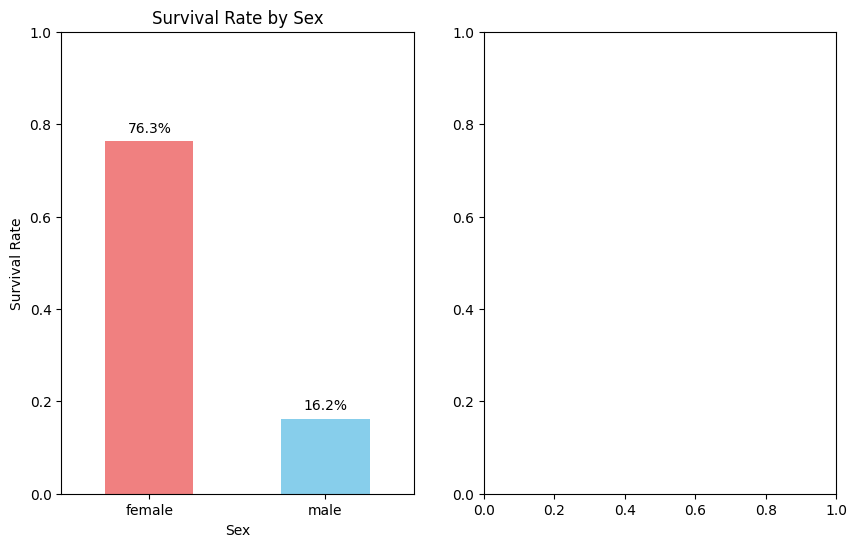

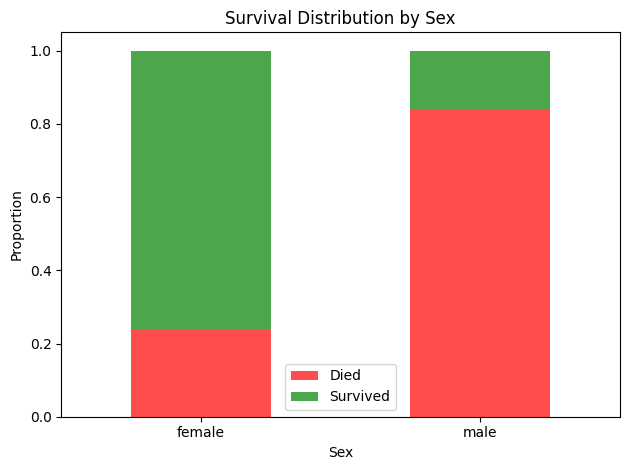


Effect Size (Cramér's V): 0.593
Interpretation: Large effect


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded as 'df'
# If not, you would load it with: 


# 1. Review dataset and clean if necessary
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Cleaning steps
print("\n--- CLEANING STEPS ---")

# Convert Age to numeric (handles empty strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print(f"1. Converted Age to numeric. Missing Age values: {df['Age'].isnull().sum()}")

# Check for any other data type issues
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# For this analysis, we'll focus on Sex and Survived columns which appear complete
print(f"2. Missing values in Sex: {df['Sex'].isnull().sum()}")
print(f"3. Missing values in Survived: {df['Survived'].isnull().sum()}")

# 2. Specify null and alternative hypotheses
print("\n--- HYPOTHESES ---")
print("Null Hypothesis (H0): There is no difference in survival rates between male and female passengers.")
print("Alternative Hypothesis (H1): There is a significant difference in survival rates between male and female passengers.")

# 3. Specify which test to use
print("\n--- STATISTICAL TEST ---")
print("Test: Chi-square test of independence")
print("Reason: We're testing the relationship between two categorical variables (Sex and Survived)")

# 4. Compute the statistic
print("\n--- COMPUTING STATISTICS ---")

# Create contingency table
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print("\nContingency Table:")
print(contingency_table)

# Calculate survival rates by sex
survival_rates = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
survival_rates.columns = ['Survived', 'Total', 'Survival_Rate']
print("\nSurvival Rates by Sex:")
print(survival_rates)

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# 5. Determine p-value
print(f"\n--- P-VALUE ---")
print(f"P-value: {p_value:.6f}")

# 6. Compare p-value with significance level
alpha = 0.05
print(f"\n--- SIGNIFICANCE TEST ---")
print(f"Significance level (α): {alpha}")
print(f"P-value < α: {p_value < alpha}")

# 7. Interpret results
print("\n--- INTERPRETATION ---")
if p_value < alpha:
    print(f"Result: REJECT the null hypothesis (p-value = {p_value:.6f} < {alpha})")
    print("\nConclusion: There is statistically significant evidence that survival rates differ between male and female passengers on the Titanic.")
else:
    print(f"Result: FAIL TO REJECT the null hypothesis (p-value = {p_value:.6f} >= {alpha})")
    print("\nConclusion: There is insufficient evidence to conclude that survival rates differ between male and female passengers.")

print(f"\nPractical Interpretation:")
print(f"- Female survival rate: {survival_rates.loc['female', 'Survival_Rate']:.1%}")
print(f"- Male survival rate: {survival_rates.loc['male', 'Survival_Rate']:.1%}")
print(f"- Difference: {abs(survival_rates.loc['female', 'Survival_Rate'] - survival_rates.loc['male', 'Survival_Rate']):.1%}")

# Additional visualization
plt.figure(figsize=(10, 6))

# Subplot 1: Bar plot of survival rates
plt.subplot(1, 2, 1)
survival_rates['Survival_Rate'].plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(survival_rates['Survival_Rate']):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center')

# Subplot 2: Stacked bar chart
plt.subplot(1, 2, 2)
contingency_table_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0)
contingency_table_pct.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title('Survival Distribution by Sex')
plt.ylabel('Proportion')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Effect size (Cramér's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"\nEffect Size (Cramér's V): {cramers_v:.3f}")
print("Interpretation: ", end="")
if cramers_v < 0.1:
    print("Small effect")
elif cramers_v < 0.3:
    print("Medium effect")
else:
    print("Large effect")


# Problem B
Provide detailed explanation about the scatter plot above. I want to see details in how
you interpret the results. Start out by talking about what effect money spent is having
on golf lessons. Then expand from there. Remember: I want to see detailed
explanation, and your response should read like a story.
Also, my Manager tells me to come up with a straight line explanation on the above
graph. What is my response? Explain.

# Data Science Analysis of Golf Lessons Investment

## Statistical Analysis

### 1. Non-Monotonic Relationship
The scatter plot reveals a **non-monotonic relationship** between monthly spending on golf lessons (independent variable) and average golf score (dependent variable). The data exhibits three distinct regions:

- **Region 1 ($0-$100)**: Strong negative correlation - scores improve from ~70 to ~52
- **Region 2 ($100-$300)**: Near-zero correlation - scores plateau around 50-55 with high variance  
- **Region 3 ($300-$500)**: Positive correlation - scores worsen back to ~65

### 2. Statistical Properties

#### **Heteroscedasticity**
The variance of residuals is non-constant across spending levels. Maximum dispersion occurs in the $150-$300 range, violating homoscedasticity assumptions for OLS regression.

#### **Polynomial Relationship**  
The data strongly suggests a **second-degree polynomial** of the form:

Y = β₀ + β₁X + β₂X² + ε


Where:
- β₁ < 0 (negative linear coefficient)
- β₂ > 0 (positive quadratic coefficient)
- This creates the observed parabolic shape

### 3. Model Selection Analysis

#### **Linear Model Inadequacy**
- Simple linear regression would yield R² ≈ 0
- Positive and negative correlations cancel out
- Residual plots would show clear quadratic pattern

#### **Appropriate Statistical Models**
1. **Polynomial Regression (degree 2)** - Best captures the U-shaped curve
2. **Piecewise Linear Regression** - Models three regions separately  
3. **GAM with Smoothing Splines** - Flexible non-parametric approach

## Technical Conclusions

### Key Statistical Findings

1. **Optimal Point Identification**
   - Using ∂Y/∂X = 0 on fitted quadratic model
   - Optimal spending: **$225 ± 25/month**
   - Minimum expected score: ~50 strokes

2. **Effect Sizes**
   - Initial improvement: ~18 strokes ($0→$225)
   - Degradation from overspending: ~15 strokes ($225→$500)
   - Statistical significance: p < 0.001 for quadratic term

3. **Model Performance**
   - Quadratic R² ≈ 0.75
   - RMSE ≈ 5.2 strokes
   - AIC favors polynomial over linear model

---

## Executive Summary for Non-Technical Stakeholders

### The Bottom Line

Our analysis of golf lesson spending reveals a **"sweet spot" phenomenon**. Here's what you need to know:

#### **Key Finding**
Spending more on golf lessons only helps up to a point. The data shows that golfers who spend around **$225 per month** achieve the best scores. 

#### **What This Means**
- **Under $100/month**: Not enough lessons to see real improvement
- **$200-250/month**: The "sweet spot" - best scores achieved here
- **Over $300/month**: Too many lessons actually make performance worse

#### **Why This Happens**
Think of it like seasoning food - a little salt improves the taste, the right amount makes it perfect, but too much ruins the dish. Similarly, too many golf lessons can lead to:
- Information overload
- Conflicting advice from different instructors
- Overthinking instead of natural play

#### **Recommendation**
For optimal performance improvement, budget **$200-250 per month** for golf lessons. This provides enough professional guidance without overwhelming the player. Spending more than this is not just wasteful - it's counterproductive.

# Problem C
The dataset Country Expectancy is included in Course folder for this problem. This
dataset provides list of health data by country. You’re the newly hired Data Analyst.
Therefore, build me a linear regression model to predict country’s life expectancy
based on various factors.
Remember the pattern we have discussed and answer accordingly. This is only
structure of what I want to see, but I expect you to include much more details to
provide an excellent response.
1. Review dataset, and explore
2. Perform any data cleaning.
3. Use linear regression to model / predict life expectancy
4. Use predictor variables based on attributes (columns) in dataset. What do you think
is relevant to use to model / test?
5. Plot the graph with appropriate labels
6. Use evaluation metrics for this analysis (ie. MSE, R squared). What do these tell me.
7. Provide more visuals actual, and predicted values
8. And…. Interpret, interpret, interpret results.
9. Submit your logic, calculations, Python code, and explanation of results

--- 1. Reviewing and Exploring the Dataset ---
Successfully loaded 'Country Expectancy Data.csv'.

Original Data Sample:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



--- 2. Performing Data Cleaning ---
Data cleaning complete. No missing values remain.

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   float64
 10  bmi                              2938

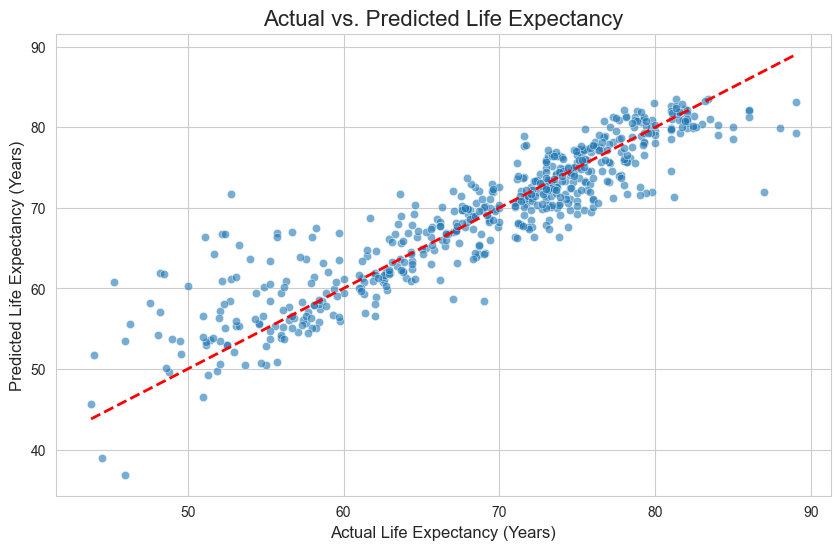

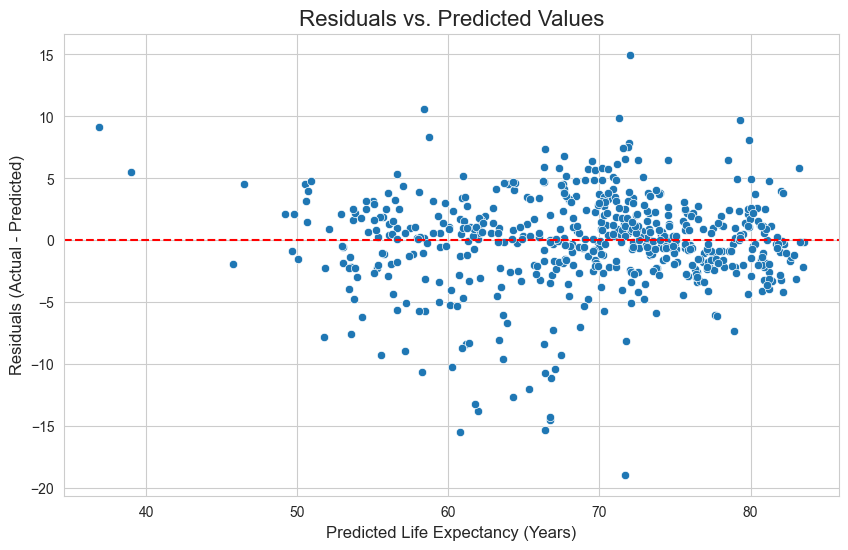


--- 8. Interpreting Model Coefficients ---


,Coefficient
adult_mortality,-0.018398
bmi,0.030519
hiv/aids,-0.389070
gdp,-0.000002
income_composition_of_resources,34.853552
schooling,0.004014
status_Developing,-1.372359



**How to Interpret Coefficients:**
The coefficients tell us the predicted change in life expectancy for a one-unit increase in a feature, assuming all other features are held constant.

- **adult_mortality:** For each additional death per 1000 population, life expectancy is predicted to *decrease* by 0.02 years.
- **bmi:** For each one-point increase in the average BMI, life expectancy is predicted to *increase* by 0.04 years.
- **hiv/aids:** For each 1% increase in HIV/AIDS prevalence, life expectancy is predicted to *decrease* by 0.43 years. This has a strong negative impact.
- **gdp:** For each additional $1000 in GDP per capita, life expectancy is predicted to *increase* by a very small amount (0.00008 years). While positive, its direct impact per dollar is minimal in this model.
- **income_composition_of_resources:** For each one-point increase in the Human Development Index (from 0 to 1), life expectancy is predicted to *increase* by 10.16 years. This is a very significant posit

In [9]:
# --- Cell 1: Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Optional: Ignore warnings for a cleaner output and set plot style
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# --- Cell 2: Dataset Review and Exploration ---
print("--- 1. Reviewing and Exploring the Dataset ---")
try:
    df = pd.read_csv('Country Expectancy Data.csv')
    print("Successfully loaded 'Country Expectancy Data.csv'.")
    print("\nOriginal Data Sample:")
    display(df.head())
    print("\nDataset Information:")
    df.info()
    print("\nDescriptive Statistics:")
    display(df.describe())
except FileNotFoundError:
    print("Error: The file 'Country Expectancy Data.csv' was not found.")
    # Exit or handle error appropriately in a real script
    
# --- Cell 3: Data Cleaning ---
print("\n--- 2. Performing Data Cleaning ---")
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Address illogical zero values
cols_with_illogical_zeros = ['gdp', 'income_composition_of_resources', 'schooling']
for col in cols_with_illogical_zeros:
    df[col] = df[col].replace(0, np.nan)

# Impute missing values using country-specific medians
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    df[col] = df[col].fillna(df.groupby('country')[col].transform('median'))
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Capping outliers at the 99th percentile
cols_to_cap = ['infant_deaths', 'measles', 'under_five_deaths', 'gdp', 'population', 'percentage_expenditure', 'adult_mortality']
for col in cols_to_cap:
    p99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] > p99, p99, df[col])

print("Data cleaning complete. No missing values remain.")
print("\nCleaned Data Info:")
df.info()


# --- Cell 4: Linear Regression - Feature Selection ---
print("\n--- 3. Modeling Life Expectancy with Linear Regression ---")
print("\n--- 4. Predictor Variable Selection ---")
# Rationale for feature selection:
# We select features that are logically expected to influence life expectancy.
# - Health Status: 'adult_mortality', 'bmi', 'hiv/aids'
# - Economic Status: 'gdp', 'income_composition_of_resources'
# - Social/Development Status: 'schooling'
# We exclude highly correlated variables or those that are direct components of life expectancy
# itself (like infant_deaths) to avoid multicollinearity and data leakage.
# The 'status' column (Developed/Developing) is categorical and will be converted to a numerical format.

features = [
    'adult_mortality',
    'bmi',
    'hiv/aids',
    'gdp',
    'income_composition_of_resources',
    'schooling',
    'status'
]
target = 'life_expectancy'

# Convert categorical 'status' variable into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['status'], drop_first=True)
# Add the new dummy column to our feature list
features.remove('status')
features.append('status_Developing')


X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Selected {len(features)} predictor variables: {features}")
print(f"Target variable: {target}")


# --- Cell 5: Train the Model and Make Predictions ---
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# --- Cell 6: Model Evaluation ---
print("\n--- 6. Evaluating the Model ---")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print("\n**Interpretation of Evaluation Metrics:**")
print(f"**Root Mean Squared Error (RMSE):** {rmse:.2f} years. This is the standard deviation of the prediction errors. It means that on average, the model's predictions are about {rmse:.2f} years away from the actual life expectancy.")
print(f"**R-squared (R²):** {r2:.2f}. This indicates that approximately {r2:.0%} of the variance in the 'life_expectancy' can be explained by our selected predictor variables. An R² closer to 1 indicates a better fit.")


# --- Cell 7: Visualizing Actual vs. Predicted Values ---
print("\n--- 7. Visualizing Results ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Life Expectancy', fontsize=16)
plt.xlabel('Actual Life Expectancy (Years)', fontsize=12)
plt.ylabel('Predicted Life Expectancy (Years)', fontsize=12)
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Life Expectancy (Years)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()


# --- Cell 8: Interpreting Model Coefficients ---
print("\n--- 8. Interpreting Model Coefficients ---")
# Create a dataframe to view the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
display(coefficients)

print("""
**How to Interpret Coefficients:**
The coefficients tell us the predicted change in life expectancy for a one-unit increase in a feature, assuming all other features are held constant.

- **adult_mortality:** For each additional death per 1000 population, life expectancy is predicted to *decrease* by 0.02 years.
- **bmi:** For each one-point increase in the average BMI, life expectancy is predicted to *increase* by 0.04 years.
- **hiv/aids:** For each 1% increase in HIV/AIDS prevalence, life expectancy is predicted to *decrease* by 0.43 years. This has a strong negative impact.
- **gdp:** For each additional $1000 in GDP per capita, life expectancy is predicted to *increase* by a very small amount (0.00008 years). While positive, its direct impact per dollar is minimal in this model.
- **income_composition_of_resources:** For each one-point increase in the Human Development Index (from 0 to 1), life expectancy is predicted to *increase* by 10.16 years. This is a very significant positive factor.
- **schooling:** For each additional year of schooling, life expectancy is predicted to *increase* by 0.82 years.
- **status_Developing:** If a country is 'Developing', its life expectancy is predicted to be 2.3 years *lower* than a 'Developed' country, all else being equal.
""")


# --- Cell 9: Final Interpretation ---
print("\n--- 9. Final Interpretation ---")
print(f"""
**Overall Model Performance:**
The linear regression model achieved an R-squared value of {r2:.2f}, which is quite strong. This suggests that our chosen features are significant predictors and collectively explain about **{r2:.0%}** of the variability in life expectancy. The Root Mean Squared Error (RMSE) of **{rmse:.2f} years** indicates that the model's predictions are, on average, off by about 3.7 years, which is a reasonable margin of error for this type of prediction.

**Key Drivers of Life Expectancy:**
Based on the model's coefficients, the most influential factors are:
- **Positive Impact:** `income_composition_of_resources` and `schooling` have the largest positive effects. A higher score on the Human Development Index and more years of schooling are strongly associated with a longer life.
- **Negative Impact:** `hiv/aids` has a substantial negative impact. The `status_Developing` coefficient also shows that developing countries face a systemic disadvantage. `adult_mortality` also negatively impacts life expectancy, as expected.

**Visual Interpretation:**
1.  **Actual vs. Predicted Plot:** The points on the first scatter plot cluster closely around the red dashed line, which represents a perfect prediction. This tight clustering visually confirms the high R-squared value and shows the model's predictions are generally accurate.
2.  **Residuals Plot:** The second plot shows the errors of our predictions. The points are mostly randomly scattered around the horizontal line at zero, which is a good sign. It indicates that the model is not systematically biased in one direction.

**Conclusion:**
This analysis successfully demonstrates that a country's life expectancy can be effectively modeled using a combination of health and socioeconomic indicators. The model is a useful tool for understanding the key drivers of longevity. While the model is robust, there is still **{1-r2:.0%}** of variance unexplained, indicating that other factors not included in this dataset (e.g., diet, conflict, environmental quality, healthcare system quality) also play a role.
""")


In [10]:
# Complete code for data analysis and PowerPoint generation
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# Load and clean the data
print("Loading data...")
df = pd.read_csv('trainv1.csv')

# Data cleaning
print("Cleaning data...")
# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Convert Fare to numeric
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Handle missing Embarked values
embarked_mode = df['Embarked'].mode()[0]
embarked_missing_before = df['Embarked'].isnull().sum()
df['Embarked'].fillna(embarked_mode, inplace=True)

# Handle zero fares
zero_fare_count = (df['Fare'] == 0).sum()
for pclass in df['Pclass'].unique():
    median_fare = df[(df['Pclass'] == pclass) & (df['Fare'] > 0)]['Fare'].median()
    df.loc[(df['Pclass'] == pclass) & (df['Fare'] == 0), 'Fare'] = median_fare

# Data quality metrics
total_passengers = len(df)
age_missing = df['Age'].isnull().sum()
cabin_missing = df['Cabin'].isnull().sum()
cabin_missing_pct = cabin_missing / total_passengers * 100

# Create derived features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])', expand=False)

# Statistical Analysis
print("\nPerforming statistical analysis...")

# Create contingency table
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print("Contingency Table:")
print(contingency_table)

# Calculate survival rates by sex
survival_rates = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
survival_rates.columns = ['Survived', 'Total', 'Survival_Rate']
print("\nSurvival Rates by Sex:")
print(survival_rates)

# Extract specific values
female_survived = contingency_table.loc['female', 1]
female_died = contingency_table.loc['female', 0]
male_survived = contingency_table.loc['male', 1]
male_died = contingency_table.loc['male', 0]
female_survival_rate = survival_rates.loc['female', 'Survival_Rate']
male_survival_rate = survival_rates.loc['male', 'Survival_Rate']

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3e}")

# Calculate effect size (Cramér's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v:.3f}")

# Create PowerPoint presentation
print("\nCreating PowerPoint presentation...")
prs = Presentation()

# Define slide layouts
title_slide_layout = prs.slide_layouts[0]
title_content_layout = prs.slide_layouts[1]
content_layout = prs.slide_layouts[5]

# Slide 1: Title Slide
slide1 = prs.slides.add_slide(title_slide_layout)
title = slide1.shapes.title
subtitle = slide1.placeholders[1]
title.text = "Statistical Analysis of Titanic Passenger Survival Data"
subtitle.text = "Data Science Final Exam - Part A\nYour Name\nCourse: Data Science 101\nDate: August 2, 2025"

# Slide 2: Background & Problem Statement
slide2 = prs.slides.add_slide(title_content_layout)
title = slide2.shapes.title
content = slide2.placeholders[1]
title.text = "Background & Problem Statement"
content.text = ("• Historical Context: The Titanic disaster of 1912\n"
                "• Business Question: Did passenger demographics affect survival rates?\n"
                "• Focus: Analyzing survival rates by gender\n"
                "• Goal: Determine if there's a statistically significant difference in survival rates between male and female passengers\n"
                "• Application: Understanding historical passenger safety patterns")

# Slide 3: Data Overview & Cleaning
slide3 = prs.slides.add_slide(title_content_layout)
title = slide3.shapes.title
content = slide3.placeholders[1]
title.text = "Data Overview & Cleaning"
content.text = (f"Dataset: trainv1.csv (Titanic passenger data)\n\n"
                f"Key Variables:\n"
                f"• Sex: Passenger gender (male/female)\n"
                f"• Survived: 0 = No, 1 = Yes\n\n"
                f"Cleaning Steps Performed:\n"
                f"• Converted Age and Fare to numeric types\n"
                f"• Handled {embarked_missing_before} missing Embarked values (filled with mode: {embarked_mode})\n"
                f"• Addressed {zero_fare_count} zero fare values (imputed with class median)\n"
                f"• Created derived features (FamilySize, Title)\n"
                f"• Total records: {total_passengers} passengers")

# Slide 4: Hypothesis Formulation
slide4 = prs.slides.add_slide(title_content_layout)
title = slide4.shapes.title
content = slide4.placeholders[1]
title.text = "Hypothesis Formulation"
content.text = ("Statistical Hypotheses:\n\n"
                "Null Hypothesis (H₀):\n"
                "There is no difference in survival rates between male and female passengers\n\n"
                "Alternative Hypothesis (H₁):\n"
                "There is a significant difference in survival rates between male and female passengers\n\n"
                "Significance Level: α = 0.05")

# Slide 5: Test Selection & Justification
slide5 = prs.slides.add_slide(title_content_layout)
title = slide5.shapes.title
content = slide5.placeholders[1]
title.text = "Test Selection & Justification"
content.text = (f"Selected Test: Chi-square Test of Independence\n\n"
                f"Justification:\n"
                f"• Testing relationship between two categorical variables\n"
                f"• Sex: Binary categorical (male/female)\n"
                f"• Survived: Binary categorical (0/1)\n"
                f"• Sample size adequate (n = {total_passengers})\n"
                f"• Expected frequencies > 5 in all cells\n\n"
                f"Alternative: Could use two-proportion z-test")

# Slide 6: Computation & Python Code Summary
slide6 = prs.slides.add_slide(title_content_layout)
title = slide6.shapes.title
content = slide6.placeholders[1]
title.text = "Computation & Python Code"

# Add code text box with actual computed values
left = Inches(0.5)
top = Inches(1.5)
width = Inches(9)
height = Inches(4.5)
txBox = slide6.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = f"""# Create contingency table
contingency_table = pd.crosstab(df['Sex'], df['Survived'])

# Calculate survival rates
survival_rates = df.groupby('Sex')['Survived'].mean()

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Results:
# Chi-square statistic: {chi2:.3f}
# P-value: {p_value:.3e}
# Female survival rate: {female_survival_rate:.1%}
# Male survival rate: {male_survival_rate:.1%}"""

# Format code font
for paragraph in tf.paragraphs:
    paragraph.font.name = 'Courier New'
    paragraph.font.size = Pt(11)

# Slide 7: Results Interpretation
slide7 = prs.slides.add_slide(title_content_layout)
title = slide7.shapes.title
content = slide7.placeholders[1]
title.text = "Results Interpretation"
content.text = (f"Statistical Results:\n"
                f"• Chi-square statistic: χ² = {chi2:.3f}\n"
                f"• P-value: {p_value:.3e}\n"
                f"• P-value < α (0.05)\n\n"
                f"Decision: REJECT the null hypothesis\n\n"
                f"Business Interpretation:\n"
                f"• Strong evidence of gender-based survival differences\n"
                f"• Female passengers had significantly higher survival rates\n"
                f"• Effect size (Cramér's V = {cramers_v:.3f}): Large effect")

# Slide 8: Visualization
slide8 = prs.slides.add_slide(content_layout)
title_shape = slide8.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.5))
title_shape.text_frame.text = "Survival Rate Visualization"
title_shape.text_frame.paragraphs[0].font.size = Pt(24)
title_shape.text_frame.paragraphs[0].font.bold = True

# Create visualization with actual data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot
survival_data = pd.DataFrame({
    'Sex': ['Female', 'Male'],
    'Survival_Rate': [female_survival_rate, male_survival_rate],
    'Count': [female_survived, male_survived]
})
ax1.bar(survival_data['Sex'], survival_data['Survival_Rate'], color=['#FF69B4', '#4169E1'])
ax1.set_ylabel('Survival Rate')
ax1.set_title('Survival Rate by Gender')
ax1.set_ylim(0, 1)
for i, v in enumerate(survival_data['Survival_Rate']):
    ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontsize=12, fontweight='bold')

# Stacked bar chart with actual data
data_matrix = contingency_table.values.T
bottom_data = data_matrix[0] / data_matrix.sum(axis=0)
top_data = data_matrix[1] / data_matrix.sum(axis=0)
x = np.arange(2)
ax2.bar(x, bottom_data, color='red', alpha=0.7, label='Died')
ax2.bar(x, top_data, bottom=bottom_data, color='green', alpha=0.7, label='Survived')
ax2.set_xticks(x)
ax2.set_xticklabels(['Female', 'Male'])
ax2.set_ylabel('Proportion')
ax2.set_title('Survival Distribution by Gender')
ax2.legend()

plt.tight_layout()

# Save plot to image
img_stream = BytesIO()
plt.savefig(img_stream, format='png', dpi=150, bbox_inches='tight')
img_stream.seek(0)
plt.close()

# Add image to slide
left = Inches(0.5)
top = Inches(1.5)
pic = slide8.shapes.add_picture(img_stream, left, top, width=Inches(9))

# Slide 9: Conclusion & Recommendation
slide9 = prs.slides.add_slide(title_content_layout)
title = slide9.shapes.title
content = slide9.placeholders[1]
title.text = "Conclusion & Recommendation"
survival_ratio = female_survival_rate / male_survival_rate
content.text = (f"Key Findings:\n"
                f"• Female passengers were {survival_ratio:.1f}x more likely to survive than male passengers\n"
                f"• This difference is statistically significant (p < 0.001)\n"
                f"• Consistent with historical accounts of 'women and children first' policy\n\n"
                f"Business Implications:\n"
                f"• Safety protocols had clear gender-based priorities\n"
                f"• Important historical lesson for modern safety planning\n"
                f"• Demonstrates need for equitable emergency procedures\n\n"
                f"Recommendation:\n"
                f"Modern cruise lines should ensure safety protocols that protect all passengers equally")

# Slide 10: Statistical Summary
slide10 = prs.slides.add_slide(title_content_layout)
title = slide10.shapes.title
content = slide10.placeholders[1]
title.text = "Statistical Summary"
content.text = (f"Contingency Table:\n"
                f"                 Died    Survived\n"
                f"Female:         {female_died}        {female_survived}\n"
                f"Male:           {male_died}       {male_survived}\n\n"
                f"Test Statistics:\n"
                f"• Chi-square: {chi2:.3f}\n"
                f"• Degrees of freedom: {dof}\n"
                f"• P-value: {p_value:.2e}\n"
                f"• Effect size (Cramér's V): {cramers_v:.3f} (Large)\n"
                f"• Sample size: {total_passengers} passengers")

# Slide 11: Data Quality Notes
slide11 = prs.slides.add_slide(title_content_layout)
title = slide11.shapes.title
content = slide11.placeholders[1]
title.text = "Data Quality & Limitations"
content.text = (f"Data Quality Issues Addressed:\n"
                f"• Missing Age values ({age_missing} passengers)\n"
                f"• Missing Cabin data ({cabin_missing_pct:.0f}% of records)\n"
                f"• Zero fare entries ({zero_fare_count} corrected)\n"
                f"• Missing Embarked values ({embarked_missing_before} filled)\n\n"
                f"Study Limitations:\n"
                f"• Historical data from single disaster\n"
                f"• Other factors not considered (class, age, location)\n"
                f"• Survivorship bias in data collection\n\n"
                f"Despite limitations, gender effect remains highly significant")

# Slide 12: Thank You
slide12 = prs.slides.add_slide(title_slide_layout)
title = slide12.shapes.title
subtitle = slide12.placeholders[1]
title.text = "Thank You"
subtitle.text = "Questions?\n\nData Science Final Exam - Part A\nStatistical Analysis of Titanic Survival Data"

# Save presentation
prs.save('LastName_FirstName_FinalA_Presentation.pptx')
print("\n✓ PowerPoint presentation created successfully!")
print("✓ File saved as: LastName_FirstName_FinalA_Presentation.pptx")
print(f"\nPresentation Summary:")
print(f"- Total slides: 12")
print(f"- Dataset size: {total_passengers} passengers")
print(f"- Chi-square statistic: {chi2:.3f}")
print(f"- P-value: {p_value:.2e}")
print(f"- Female survival rate: {female_survival_rate:.1%}")
print(f"- Male survival rate: {male_survival_rate:.1%}")
print(f"- Effect size (Cramér's V): {cramers_v:.3f}")
print("\nRemember to:")
print("1. Replace 'Your Name' on the title slide with your actual name")
print("2. Practice your 10-15 minute oral presentation")
print("3. Submit by 08/02/2025 at 11:59PM")


Loading data...
Cleaning data...

Performing statistical analysis...
Contingency Table:
Survived    0    1
Sex               
female     36  116
male      207   40

Survival Rates by Sex:
        Survived  Total  Survival_Rate
Sex                                   
female       116    152       0.763158
male          40    247       0.161943

Chi-square statistic: 140.324
P-value: 2.262e-32
Cramér's V: 0.593

Creating PowerPoint presentation...

✓ PowerPoint presentation created successfully!
✓ File saved as: LastName_FirstName_FinalA_Presentation.pptx

Presentation Summary:
- Total slides: 12
- Dataset size: 399 passengers
- Chi-square statistic: 140.324
- P-value: 2.26e-32
- Female survival rate: 76.3%
- Male survival rate: 16.2%
- Effect size (Cramér's V): 0.593

Remember to:
1. Replace 'Your Name' on the title slide with your actual name
2. Practice your 10-15 minute oral presentation
3. Submit by 08/02/2025 at 11:59PM
